In [1]:
import cv2
from keras.callbacks import *
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.utils import to_categorical
import sys
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def read_img(file_name, color_inv_norm=True):
    """
    read a image from local file system
    :param file_name:
    :param color_inv_norm:
    :return:
    """
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

    if color_inv_norm:
        img = 255 - img

        # img = remove_back(img, np.ones((5, 5), np.uint8))

        img = img / 255.0
    else:
        img[img < 50] = 0
        img = img / 255.0

    return img

In [3]:
def get_non0_index_scope(l):
    """

    :param l:
    :return:
    """
    if l[0]:
        start = 0
    else:
        start = l.index(True)
    l.reverse()
    if l[0]:
        end = 0
    else:
        end = l.index(True)
    end = len(l) - end
    return start, end


def get_min_content_area(img):
    """

    :param img:
    :return:
    """
    col_proj = (np.sum(img, axis=0) != 0).tolist()
    row_proj = (np.sum(img, axis=1) != 0).tolist()
    col_start, col_end = get_non0_index_scope(col_proj)
    row_start, row_end = get_non0_index_scope(row_proj)

    return row_start, row_end, col_start, col_end


def get_resize_padding_img(img, size=None, padding=None):
    """

    :param img:
    :param size:
    :param padding:
    :return:
    """
    if size and padding:
        sub_img = cv2.resize(img, size)
        sub_img = np.pad(sub_img, padding, mode='constant')
        sub_img = np.pad(sub_img, ((3,), (3,)), mode='constant')
    else:
        sub_img = cv2.resize(img, (28, 28))
    return sub_img

In [5]:
from keras.models import *
model = load_model('cnn3_gen_1.1.h5')

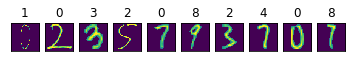

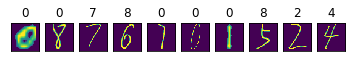

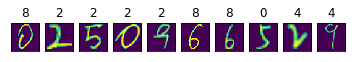

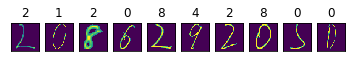

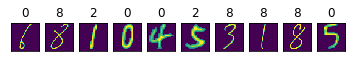

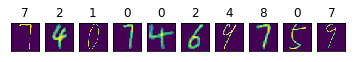

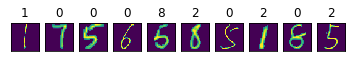

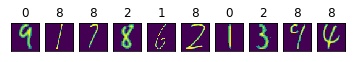

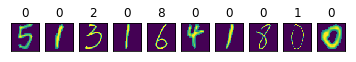

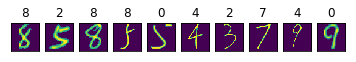

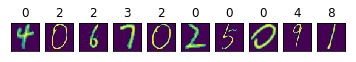

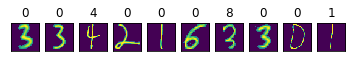

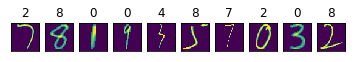

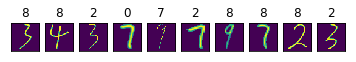

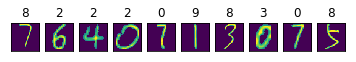

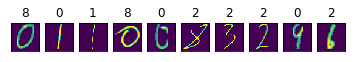

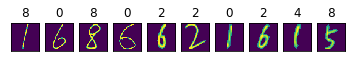

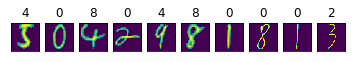

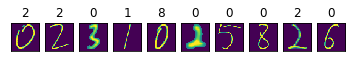

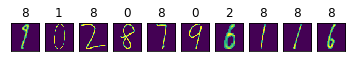

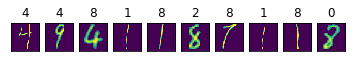

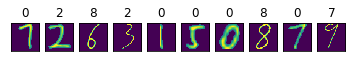

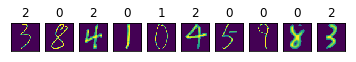

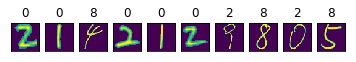

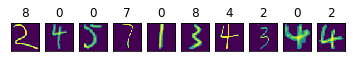

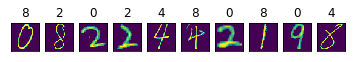

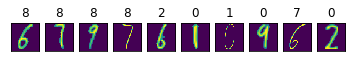

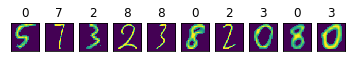

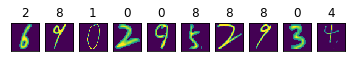

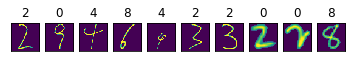

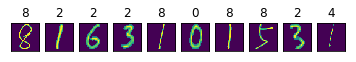

ValueError: num must be 1 <= num <= 60, not 61

In [8]:
import os
j = 1
l = os.listdir('D:\\pyproj\\wonderful\\data\\nums\\done')
l0 = l[: 50]
l1 = l[50: 100]
l2 = l[100: 150]
l3 = l[150: 200]
l4 = l[200: 250]
l5 = l[250: ]
for i in l0:
    
    img = cv2.imread(os.path.join('D:\\pyproj\\wonderful\\data\\nums\\done', i), cv2.IMREAD_GRAYSCALE)

    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img[img < 0.16] = 0.0
    img[img > 0] += 0.2
    img[img > 1.] = 1.
    sub_img = preprocessing(img)
    
    plt.subplot(5, 10, j)
    plt.imshow(sub_img)
    plt.xticks([])  #去掉横坐标值
    plt.yticks([])  #去掉纵坐标值
    plt.axis = False
    plt.title(np.argmax(model.predict(np.expand_dims(np.expand_dims(sub_img, axis=-1), axis=0))))
#     print(model.predict(np.expand_dims(np.expand_dims(sub_img, axis=-1), axis=0)))
    if j % 10 == 0:
        plt.show()
    j += 1
    
j = 1
for i in l1:
    
    img = cv2.imread(os.path.join('D:\\pyproj\\wonderful\\data\\nums\\done', i), cv2.IMREAD_GRAYSCALE)

    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img[img < 0.16] = 0.0
    img[img > 0] += 0.2
    img[img > 1.] = 1.
    sub_img = preprocessing(img)
    
    plt.subplot(5, 10, j)
    plt.imshow(sub_img)
    plt.xticks([])  #去掉横坐标值
    plt.yticks([])  #去掉纵坐标值
    plt.axis = False
    plt.title(np.argmax(model.predict(np.expand_dims(np.expand_dims(sub_img, axis=-1), axis=0))))
    
    if j % 10 == 0:
        plt.show()
    j += 1

j = 1
for i in l2:
    
    img = cv2.imread(os.path.join('D:\\pyproj\\wonderful\\data\\nums\\done', i), cv2.IMREAD_GRAYSCALE)

    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img[img < 0.16] = 0.0
    img[img > 0] += 0.2
    img[img > 1.] = 1.
    sub_img = preprocessing(img)
    
    plt.subplot(5, 10, j)
    plt.imshow(sub_img)
    plt.xticks([])  #去掉横坐标值
    plt.yticks([])  #去掉纵坐标值
    plt.axis = False
    plt.title(np.argmax(model.predict(np.expand_dims(np.expand_dims(sub_img, axis=-1), axis=0))))
    
    if j % 10 == 0:
        plt.show()
    j += 1
    
j = 1
for i in l3:
    
    img = cv2.imread(os.path.join('D:\\pyproj\\wonderful\\data\\nums\\done', i), cv2.IMREAD_GRAYSCALE)

    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img[img < 0.16] = 0.0
    img[img > 0] += 0.2
    img[img > 1.] = 1.
    sub_img = preprocessing(img)
    
    plt.subplot(5, 10, j)
    plt.imshow(sub_img)
    plt.xticks([])  #去掉横坐标值
    plt.yticks([])  #去掉纵坐标值
    plt.axis = False
    plt.title(np.argmax(model.predict(np.expand_dims(np.expand_dims(sub_img, axis=-1), axis=0))))
    
    if j % 10 == 0:
        plt.show()
    j += 1
    
j = 1
for i in l4:
    
    img = cv2.imread(os.path.join('D:\\pyproj\\wonderful\\data\\nums\\done', i), cv2.IMREAD_GRAYSCALE)

    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img[img < 0.16] = 0.0
    img[img > 0] += 0.2
    img[img > 1.] = 1.
    sub_img = preprocessing(img)
    
    plt.subplot(5, 10, j)
    plt.imshow(sub_img)
    plt.xticks([])  #去掉横坐标值
    plt.yticks([])  #去掉纵坐标值
    plt.axis = False
    plt.title(np.argmax(model.predict(np.expand_dims(np.expand_dims(sub_img, axis=-1), axis=0))))
    
    if j % 10 == 0:
        plt.show()
    j += 1
    
j = 1
for i in l5:
    
    img = cv2.imread(os.path.join('D:\\pyproj\\wonderful\\data\\nums\\done', i), cv2.IMREAD_GRAYSCALE)

    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img[img < 0.16] = 0.0
    img[img > 0] += 0.2
    img[img > 1.] = 1.
    sub_img = preprocessing(img)
    
    plt.subplot(6, 10, j)
    plt.imshow(sub_img)
    plt.xticks([])  #去掉横坐标值
    plt.yticks([])  #去掉纵坐标值
    plt.axis = False
    plt.title(np.argmax(model.predict(np.expand_dims(np.expand_dims(sub_img, axis=-1), axis=0))))
    
    if j % 10 == 0:
        plt.show()
    j += 1
